# import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns

2024-05-29 07:03:30.426296: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-29 07:03:31.546097: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-29 07:03:33.843189: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-29 07:03:36.865077: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# đọc dữ liệu

In [2]:
FPT = pd.read_csv('FPT.csv')
MSN = pd.read_csv('MSN.csv')
PNJ = pd.read_csv('PNJ.csv')
VIC = pd.read_csv('VIC.csv')
FPT

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0
...,...,...,...,...,...,...,...,...
97401,FPT,12/22/2020 14:24,58.20,58.20,58.20,58.20,27470,0
97402,FPT,12/22/2020 14:25,58.20,58.20,58.20,58.20,14820,0
97403,FPT,12/22/2020 14:26,58.20,58.20,58.20,58.20,500,0
97404,FPT,12/22/2020 14:29,58.10,58.10,58.10,58.10,2500,0


# analyst cơ bản

In [3]:
FPT['fluctuations'] = FPT['Close'].shift(-1) - FPT['Close']
MSN['fluctuations'] = MSN['Close'].shift(-1) - MSN['Close']
PNJ['fluctuations'] = PNJ['Close'].shift(-1) - PNJ['Close']
VIC['fluctuations'] = VIC['Close'].shift(-1) - VIC['Close']

In [4]:
print(FPT.describe())

               Open          High           Low         Close        Volume  \
count  97406.000000  97406.000000  97406.000000  97406.000000  9.740600e+04   
mean      45.071630     45.090138     45.051430     45.071631  8.044173e+03   
std        6.359803      6.364950      6.354245      6.359799  1.753203e+04   
min       30.250000     30.250000     30.220000     30.250000  1.000000e+01   
25%       39.740000     39.740000     39.700000     39.740000  7.500000e+02   
50%       46.950000     46.950000     46.950000     46.950000  2.960000e+03   
75%       49.200000     49.250000     49.170000     49.200000  8.960000e+03   
max       58.400000     58.500000     58.400000     58.400000  1.255930e+06   

       Open Interest  fluctuations  
count        97406.0  97405.000000  
mean             0.0      0.000279  
std              0.0      0.063485  
min              0.0     -2.390000  
25%              0.0      0.000000  
50%              0.0      0.000000  
75%              0.0      0.0

In [5]:
print(MSN.describe())

                Open           High            Low          Close  \
count  135354.000000  135354.000000  135354.000000  135354.000000   
mean       74.878809      74.931668      74.834625      74.880759   
std        15.418074      15.426954      15.412677      15.418857   
min        46.500000      46.500000      46.400000      46.400000   
25%        57.900000      57.900000      57.800000      57.800000   
50%        79.100000      79.200000      79.100000      79.100000   
75%        86.000000      86.100000      86.000000      86.000000   
max       117.800000     118.000000     117.700000     118.000000   

             Volume  Open Interest   fluctuations  
count  1.353540e+05       135354.0  135353.000000  
mean   5.683578e+03            0.0       0.000072  
std    2.798513e+04            0.0       0.216196  
min    1.000000e+01            0.0      -5.900000  
25%    5.000000e+02            0.0       0.000000  
50%    2.000000e+03            0.0       0.000000  
75%    5.56000

In [6]:
print(PNJ.describe())

                Open           High            Low          Close  \
count  125309.000000  125309.000000  125309.000000  125309.000000   
mean       72.182052      72.372590      72.042287      72.179371   
std         9.900263       9.995786       9.830847       9.899401   
min        44.430000      44.530000      44.040000      44.140000   
25%        64.600000      64.700000      64.570000      64.600000   
50%        72.800000      73.010000      72.640000      72.830000   
75%        80.160000      80.350000      80.060000      80.160000   
max       100.160000     100.160000     100.160000     100.160000   

              Volume  Open Interest   fluctuations  
count  125309.000000       125309.0  125308.000000  
mean     3031.830451            0.0      -0.000006  
std      7248.952968            0.0       0.690948  
min         1.000000            0.0      -6.000000  
25%       220.000000            0.0      -0.070000  
50%      1000.000000            0.0       0.000000  
75%    

In [7]:
print(VIC.describe())

                Open           High            Low          Close  \
count  101266.000000  101266.000000  101266.000000  101266.000000   
mean      105.376460     105.418519     105.334147     105.378791   
std        11.543158      11.535584      11.552338      11.545054   
min        68.000000      68.000000      68.000000      68.000000   
25%        95.400000      95.400000      95.300000      95.400000   
50%       105.300000     105.300000     105.200000     105.300000   
75%       115.800000     115.900000     115.800000     115.800000   
max       126.100000     126.500000     126.100000     126.500000   

             Volume  Open Interest   fluctuations  
count  1.012660e+05       101266.0  101265.000000  
mean   3.182640e+03            0.0       0.000071  
std    1.469814e+04            0.0       0.199338  
min    1.000000e+01            0.0      -7.400000  
25%    2.300000e+02            0.0       0.000000  
50%    1.020000e+03            0.0       0.000000  
75%    3.00000

## xây dựng hàm vẽ

In [8]:
FPT = FPT.fillna(0)
MSN = MSN.fillna(0)
PNJ = PNJ.fillna(0)
VIC = VIC.fillna(0)

## vẽ sự biến động của giá

In [13]:
def plot_stock_prices(ax, df, title):
    # Chuyển đổi cột 'Date/Time' thành định dạng datetime
    df['Date/Time'] = pd.to_datetime(df['Date/Time'])
    
    ax.hist(df['fluctuations'], bins=10, edgecolor='black')
    ax.set_xlabel('Fluctuation')
    ax.set_ylabel('count')
    ax.set_title(title)
    ax.grid(True)

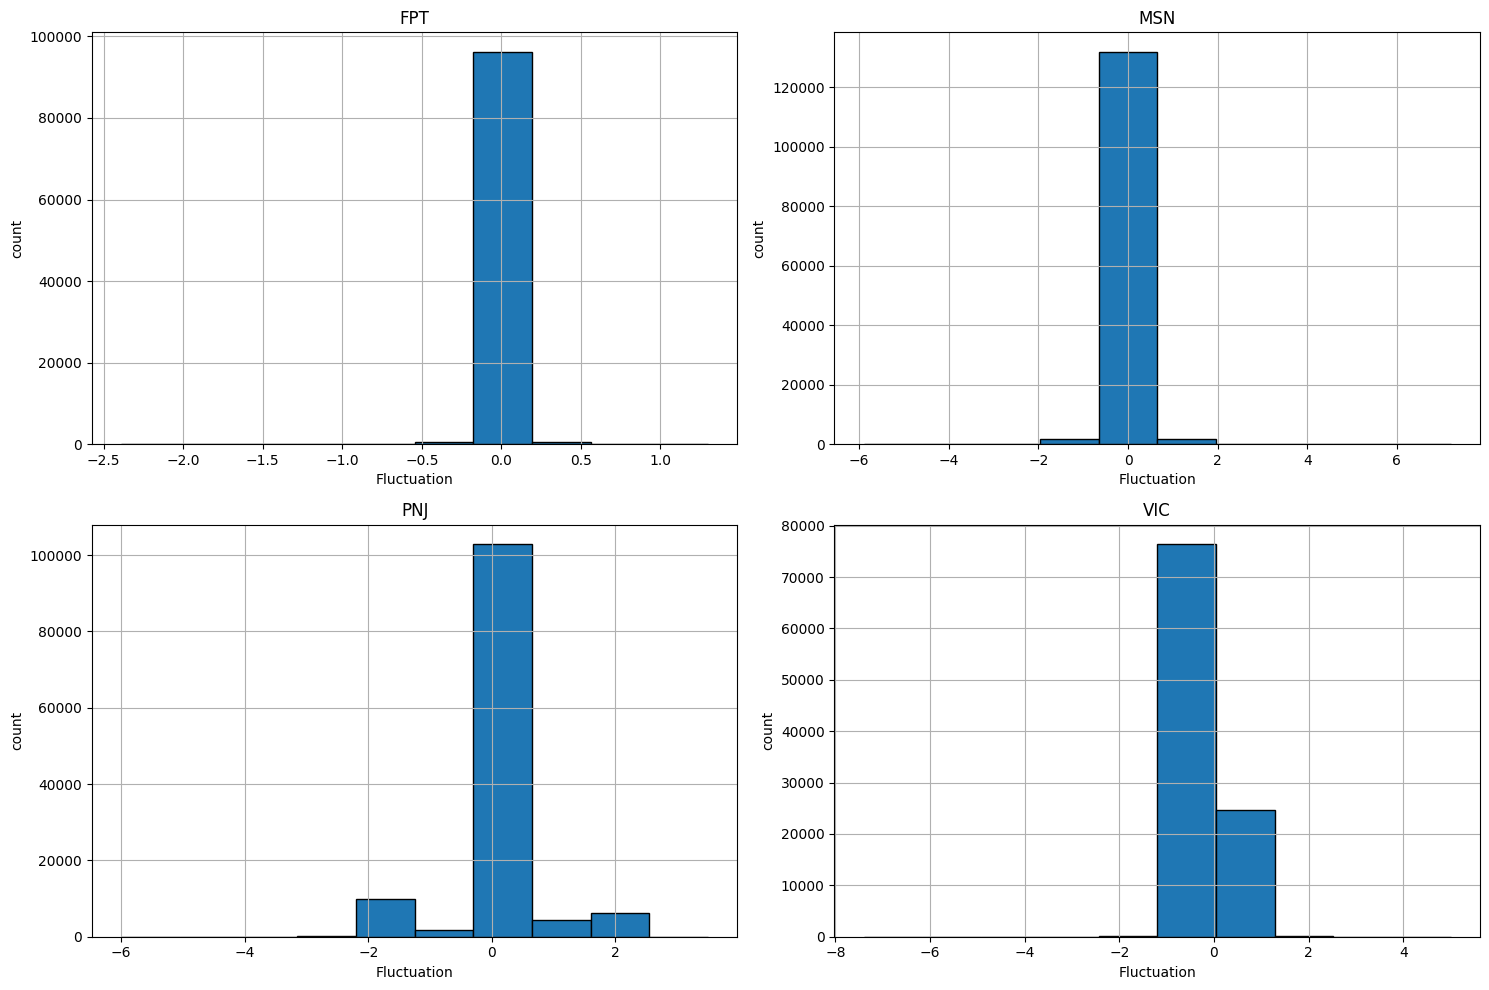

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
# Vẽ biểu đồ cho từng công ty
plot_stock_prices(axs[0, 0], FPT, 'FPT')
plot_stock_prices(axs[0, 1], MSN, 'MSN')
plot_stock_prices(axs[1, 0], PNJ, 'PNJ')
plot_stock_prices(axs[1, 1], VIC, 'VIC')

plt.tight_layout()
plt.show()

- Chứng khoán dường như không có sự biến động nhiều giữa giá bán mở và giá bán khi đóng cửa. Điều này cho thấy thị trường có thể đang ở trạng thái ổn định, với tâm lý nhà đầu tư không thay đổi đáng kể trong suốt phiên giao dịch. Mức biến động thấp này cũng có thể phản ánh một sự cân bằng giữa cung và cầu, khi mà lượng mua và bán đạt được một trạng thái tương đối ổn định. Hơn nữa, nó có thể chỉ ra rằng không có thông tin hoặc sự kiện nào lớn xảy ra đủ để gây ra những phản ứng mạnh mẽ từ phía thị trường. Tuy nhiên, điều này không có nghĩa là thị trường sẽ duy trì trạng thái ổn định này trong dài hạn, vì chỉ cần một tin tức quan trọng hoặc thay đổi kinh tế bất ngờ cũng có thể dẫn đến những biến động lớn hơn.
- với PNJ và VIC là 2 mã chứng khoán có biến động lớn hơn so với 2 mã còn lại. FPT là mã chứng khoán có biến động nhỏ nhất
- Nhưng đối với 4 mã này thì có mã PNJ là mã có độ chênh lệch dương là nhiều hơn so với các mã còn lại nên nếu được thì mã PNJ vẫn là mã có khả năng cho ra nhiều lợi nhuận hơn.

# train model (file FPT)

In [15]:
FPT['Date/Time'] = pd.to_datetime(FPT['Date/Time'], format='%m/%d/%Y %H:%M')
FPT.set_index('Date/Time', inplace=True)
FPT

,Ticker,Open,High,Low,Close,Volume,Open Interest,fluctuations
Date/Time,,,,,,,,
2018-12-25 09:15:00,FPT,30.89,30.89,30.89,30.89,35410,0,-0.08
2018-12-25 09:16:00,FPT,30.81,30.81,30.81,30.81,190,0,-0.07
2018-12-25 09:17:00,FPT,30.74,30.81,30.74,30.74,1120,0,0.00
2018-12-25 09:18:00,FPT,30.74,30.74,30.74,30.74,2120,0,0.00
2018-12-25 09:19:00,FPT,30.74,30.74,30.74,30.74,22500,0,0.00
...,...,...,...,...,...,...,...,...
2020-12-22 14:24:00,FPT,58.20,58.20,58.20,58.20,27470,0,0.00
2020-12-22 14:25:00,FPT,58.20,58.20,58.20,58.20,14820,0,0.00
2020-12-22 14:26:00,FPT,58.20,58.20,58.20,58.20,500,0,-0.10


## Polynomial Regression

- là một phương pháp mở rộng của hồi quy tuyến tính, cho phép mô hình hóa mối quan hệ phi tuyến tính giữa biến độc lập và biến phụ thuộc bằng cách sử dụng các bậc cao hơn của biến độc lập. Trong Polynomial Regression, phương trình hồi quy có dạng:

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \cdots + \beta_n x^n + \epsilon
$$
- ở đây em chỉ chọn bậc 3
    + Nắm bắt mối quan hệ phi tuyến tính:
    Thị trường chứng khoán thường không tuân theo các mô hình tuyến tính đơn giản. Đa thức bậc 3 có thể mô hình hóa các mối quan hệ phức tạp hơn giữa giá cổ phiếu và thời gian, bao gồm các thay đổi không tuyến tính như xu hướng tăng trưởng, đỉnh và đáy của giá.

    + Tránh quá khớp (Overfitting):
    Sử dụng đa thức bậc cao có thể dẫn đến hiện tượng quá khớp, trong đó mô hình quá phù hợp với dữ liệu huấn luyện và mất khả năng dự đoán cho dữ liệu mới. Đa thức bậc 3 là một sự cân bằng tốt giữa độ phức tạp và khả năng khái quát hóa, giúp tránh được quá khớp trong nhiều trường hợp.

    + Đơn giản hóa tính toán:
    Mô hình đa thức bậc 3 đơn giản hơn so với các mô hình bậc cao hơn, làm cho việc tính toán và tối ưu hóa dễ dàng hơn. Điều này cũng giúp giảm thiểu chi phí tính toán và thời gian huấn luyện.

    + Giải thích dễ dàng hơn:
    Một mô hình bậc 3 thường dễ hiểu hơn và có thể được giải thích dễ dàng cho các nhà đầu tư hoặc người ra quyết định so với các mô hình phức tạp hơn. Điều này có thể quan trọng trong việc thuyết phục các bên liên quan về tính khả thi và độ tin cậy của mô hình dự báo.

    + Khả năng bắt các xu hướng và dao động:
    Đa thức bậc 3 đủ linh hoạt để bắt các xu hướng chung và các dao động trong dữ liệu giá cổ phiếu mà không bị quá nhạy cảm với các biến động ngẫu nhiên, giúp mô hình có thể đưa ra dự đoán hợp lý hơn về xu hướng dài hạn.

In [16]:
X = FPT[['High', 'Low', 'Open', 'Close']].values
y = FPT['fluctuations'].values.reshape(-1, 1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
degree = 3  # Bậc của đa thức
poly = PolynomialFeatures(degree=degree)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [19]:
model = LinearRegression()
model.fit(X_poly_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_poly_test)

In [21]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.0034377513871852615
R^2 Score: 0.06909323220030927


In [22]:
y_train_pred = model.predict(X_poly_train)
y_test_pred = model.predict(X_poly_test)

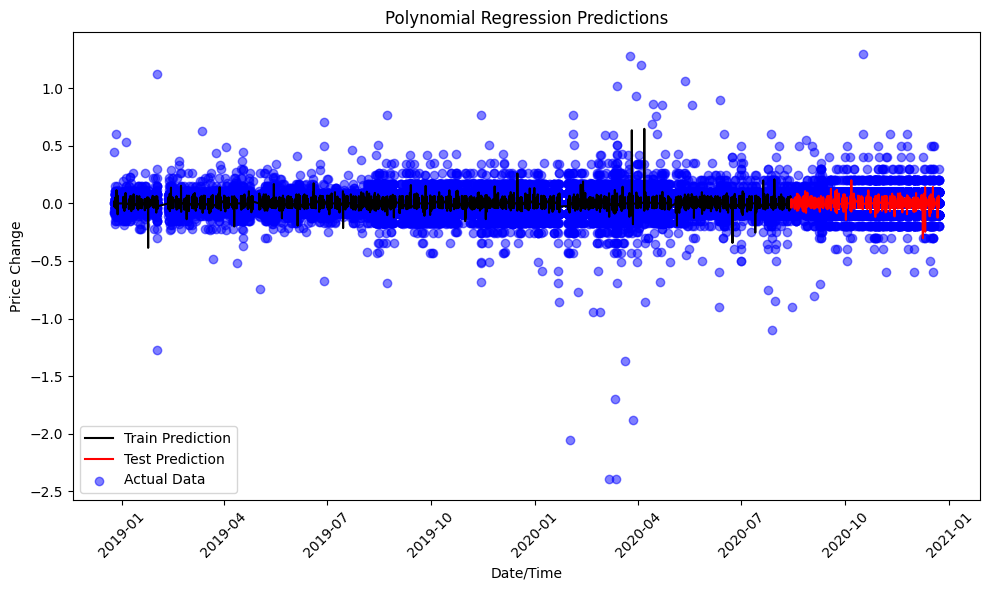

In [23]:
# Vẽ biểu đồ đường dự đoán cho dữ liệu huấn luyện và kiểm tra
plt.figure(figsize=(10, 6))
plt.plot(FPT.index[:-len(y_test)], y_train_pred, label='Train Prediction', color='black')
plt.plot(FPT.index[-len(y_test):], y_test_pred, label='Test Prediction', color='red')
plt.scatter(FPT.index, y, color='blue', label='Actual Data', alpha=0.5)

plt.xlabel('Date/Time')
plt.ylabel('Price Change')
plt.title('Polynomial Regression Predictions')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()